In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")


c:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_excel("20230503_3.3_Tagesaufgaben_Datensatz.xlsx")
df.head()

,Geschlecht,Berufsbranche,Alter,Einkommen im Jahr
0,1,Offentliche Dienst,24,51056
1,1,Offentliche Dienst,41,114530
2,0,Medienbranche,34,51905
3,1,Handel,29,57005
4,1,Banken,19,97708


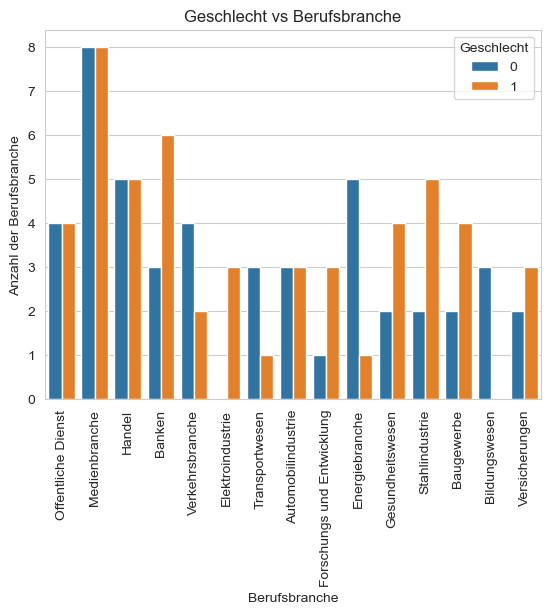

In [21]:
ax = sns.countplot(x='Berufsbranche', hue='Geschlecht', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Geschlecht vs Berufsbranche")
plt.xlabel("Berufsbranche")
plt.ylabel("Anzahl der Berufsbranche")
plt.show()

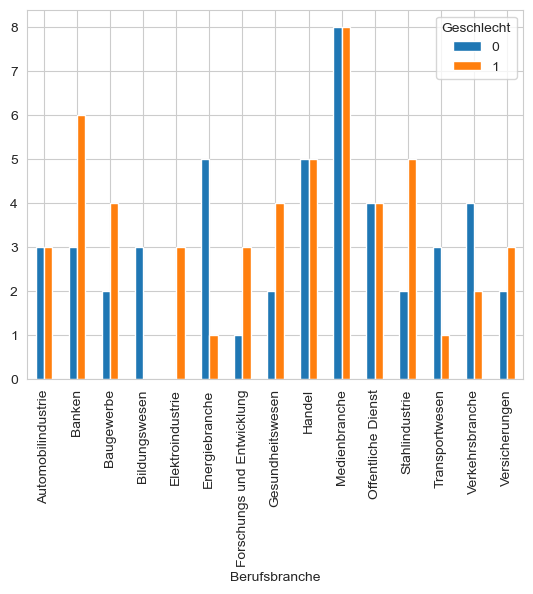

In [18]:
# alternativ
pd.crosstab(df['Berufsbranche'],df['Geschlecht']).plot.bar();


***

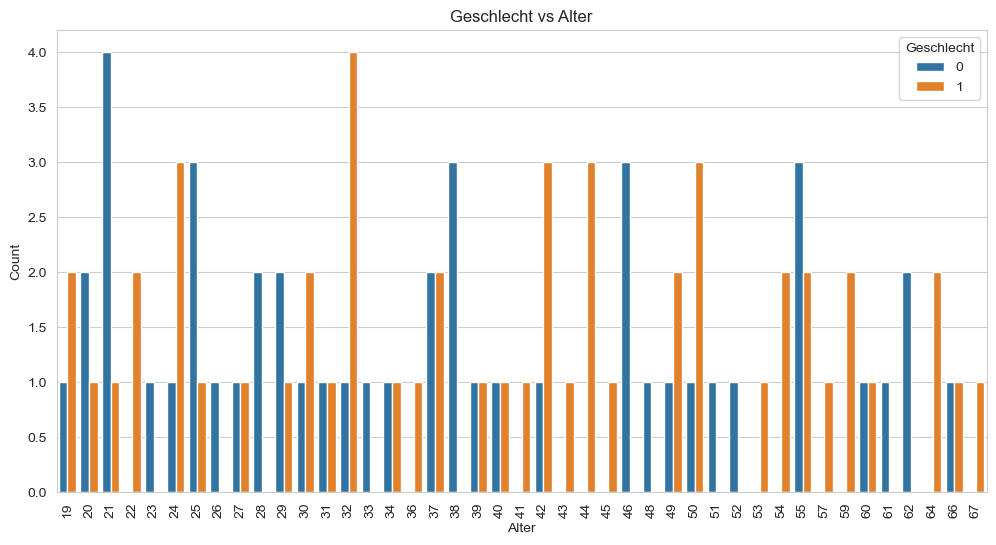

In [15]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Alter', hue='Geschlecht', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Geschlecht vs Alter")
plt.xlabel("Alter")
plt.ylabel("Count")
plt.show()

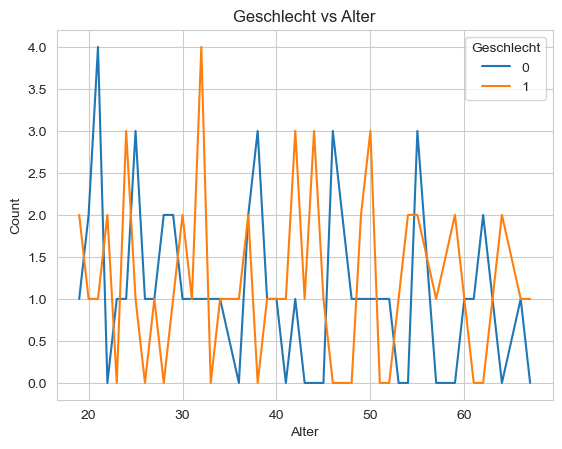

In [20]:
pd.crosstab(df['Alter'],df['Geschlecht']).plot.line()
plt.title("Geschlecht vs Alter")
plt.xlabel("Alter")
plt.ylabel("Count")
plt.show()

***

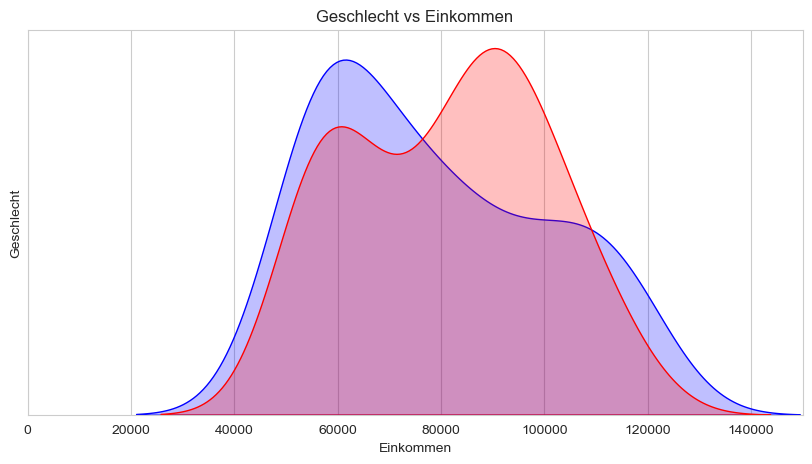

In [27]:
fig = plt.figure(figsize=(10, 5))
male_only = df[df['Geschlecht'] == 1]
female_only = df[df['Geschlecht'] == 0]


ax = sns.kdeplot(male_only['Einkommen im Jahr'], color ='Blue', label='Male', shade=True)
ax = sns.kdeplot(female_only['Einkommen im Jahr'], color='Red', label='Female', shade=True)

plt.yticks([])
plt.title('Geschlecht vs Einkommen')
plt.ylabel('Geschlecht')
plt.xlabel('Einkommen')
plt.xlim(0, 150000)
plt.show()

***

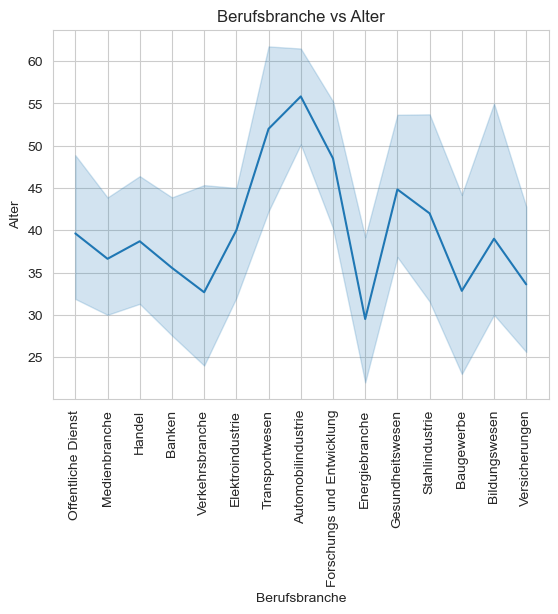

In [29]:
ax = sns.lineplot(df, x="Berufsbranche", y="Alter")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Berufsbranche vs Alter")
plt.xlabel("Berufsbranche")
plt.ylabel("Alter")
plt.show()

***

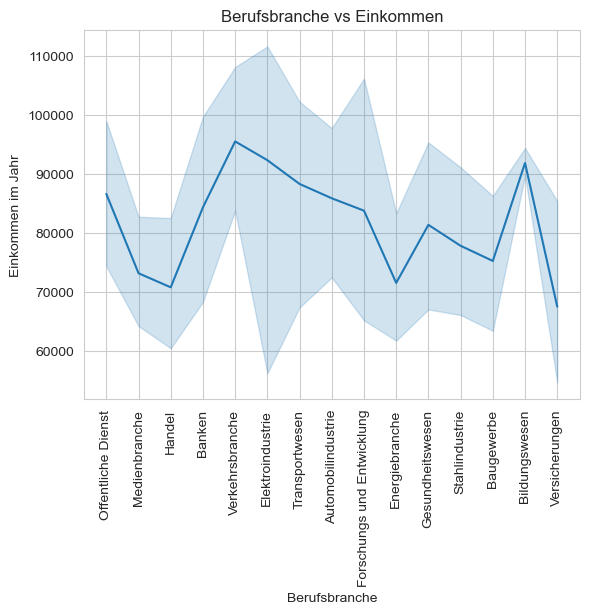

In [32]:
ax = sns.lineplot(df, x="Berufsbranche", y="Einkommen im Jahr")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Berufsbranche vs Einkommen")
plt.xlabel("Berufsbranche")
plt.ylabel("Einkommen im Jahr")
plt.show()


***

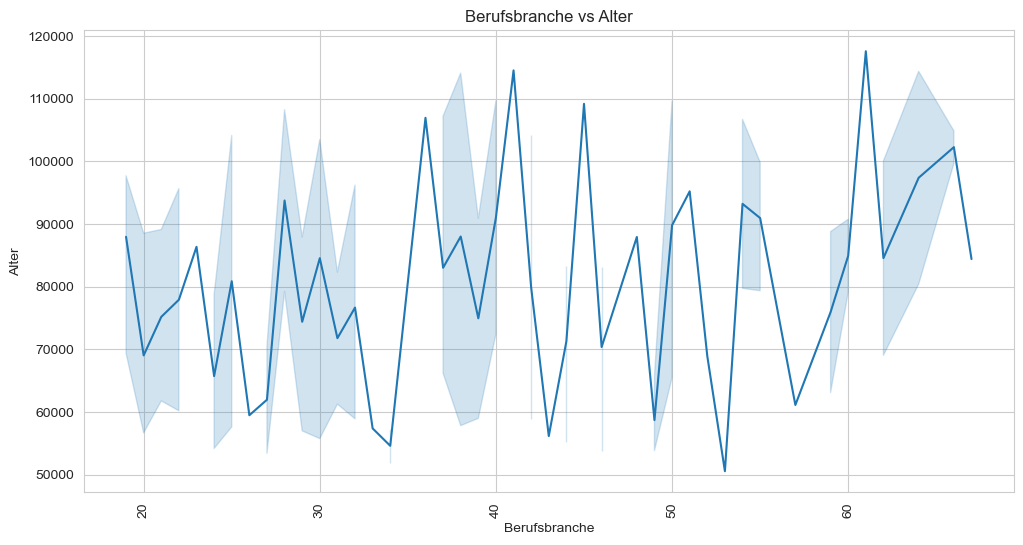

In [34]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(df, x="Alter", y="Einkommen im Jahr")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Berufsbranche vs Alter")
plt.xlabel("Berufsbranche")
plt.ylabel("Alter")
plt.show()

***

### jana

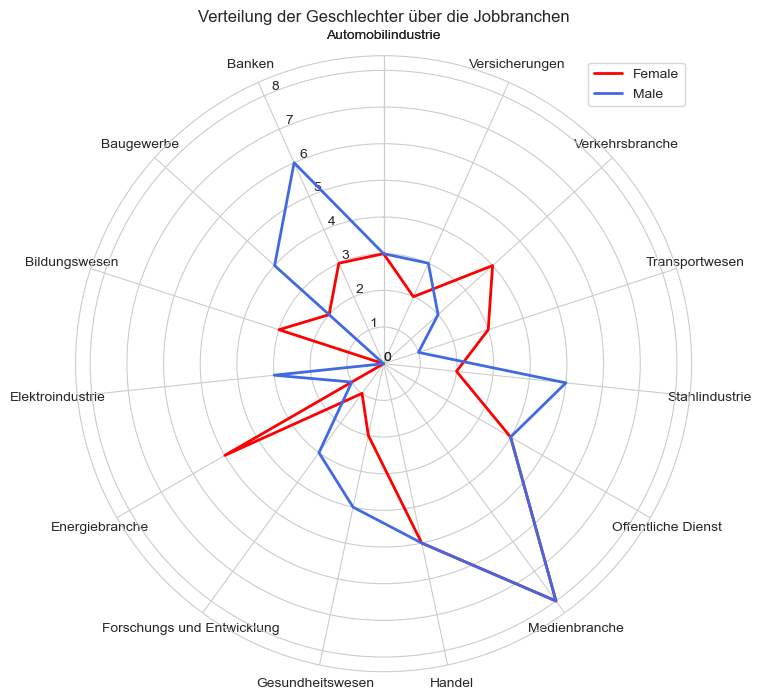

In [4]:
# Ersetzen 1 mit 'Male' und 0 mit 'Female'
df['Geschlecht'] = df['Geschlecht'].replace({1: 'Male', 0: 'Female'})

# Nach Geschlecht und Branche gruppieren und Anteile zählen
grouped = df.groupby(['Geschlecht', 'Berufsbranche']).size().reset_index(name='count')

# Pivot-df mit Geschlecht als Reihen und Jobbrance als Spalten. Eventuelle NaN Werte werden mit 0 gefüllt
matrix = grouped.pivot(index='Geschlecht', columns='Berufsbranche', values='count').fillna(0)

# Winkel berechnen
# Die Funktion teilt den Winkelkreis in gleiche Abschnitte auf, wobei len(matrix.columns) die Anzahl der Abschnitte festlegt. Das Argument endpoint=False gibt an, dass der letzte Punkt des Arrays nicht das Endpunkt-Interval beinhalten soll.
angles = np.linspace(0, 2*np.pi, len(matrix.columns), endpoint=False)

# Die Funktion np.concatenate() wird verwendet, um das Array der Winkel um ein weiteres Element zu erweitern, das den Startwinkel enthält.
angles = np.concatenate((angles,[angles[0]]))

# Erstellen des Plots und Subplots
# Erstellen eines Subplots mit einer polar Koordinatenachse. Das bedeutet, dass die Achsen in Kreisbögen und -winkeln dargestellt werden, anstatt wie üblich in geraden Linien.
# Der 111 Parameter gibt an, dass es sich um einen einzelnen Subplot handelt, der die gesamte Zeichenfläche einnimmt.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Farbpalette für die beiden Geschlechter erstellen
colors = sns.color_palette(['red', 'royalblue'])

# Jede Reihe wird als Linie geplotted
for i, (name, row) in enumerate(matrix.iterrows()):
    # Für jede Zeile werden die Werte in der Zeile mit flatten() in eine flache Liste umgewandelt und dann mit tolist() in eine normale Python-Liste konvertiert.
    values = row.values.flatten().tolist()
    # Da ein Polygon in einem polar-Koordinatensystem immer ein geschlossenes Polygon ist, wird die Liste durch Hinzufügen des ersten Elements am Ende der Liste geschlossen, damit das Polygon geschlossen werden kann.
    values += values[:1]
    # Diese geschlossene Liste wird dann zusammen mit den angles als X-Werte und den values als Y-Werte an ax.plot() übergeben.
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=name, color=colors[i])

# Legende und Labels setzen
# Spaltennamen der Matrix in eine Liste umgewandeln
matrix_columns = matrix.columns.tolist()
# Dann wird der erste Spaltenname als zusätzliches Element an das Ende der Liste angehängt. Dadurch erhält man eine Liste, die genauso viele Elemente wie die Anzahl der Spalten der Matrix plus eins hat.
matrix_columns.append(matrix.columns[0])
# Orientierung und die Beschriftung der Polarachse. Hierbei werden die Winkel aus dem vorherigen Schritt in Grad umgewandelt und als ersten Parameter übergeben. Der zweite Parameter ist die Liste der Achsenbeschriftungen (Liste der Spaltennamen)
ax.set_thetagrids(angles * 180/np.pi, matrix_columns)
# Position des Nullpunkts der Polarachse auf den Norden ("N") festlegen
ax.set_theta_zero_location("N")
# Legende nach oben rechts
ax.legend(loc='upper right')
# Titel des Diagramms
plt.title('Verteilung der Geschlechter über die Jobbranchen')

# maximale Wert im Datenbereich herausfinden, um als Höchstwert für die Skala zu nutzen
max_count = matrix.values.max()
# Ticks festlegen zur Darstellung der Zahlen in dem Diagramm
ticks = [int(i) for i in np.linspace(0, max_count, 10)]
# Ticks der y-Achse festlegen anhand der Variable ticks
ax.set_yticks(ticks)
# Labels werden als die Tick-Werte selbst festgelegt
ax.set_yticklabels(ticks)
# Anzeige
plt.show()

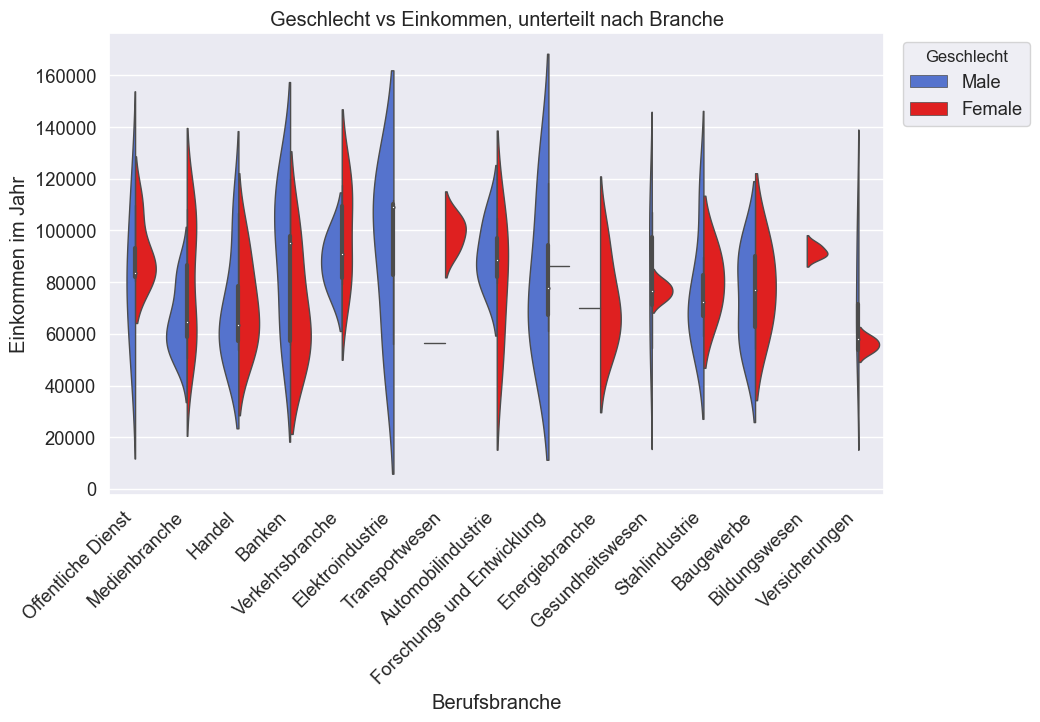

In [5]:
# Vergrößern des Diagramm Outputs, indem der Standard von Seaborn angepasst wird
sns.set(font_scale=1.2, rc={'figure.figsize':(10,6)})

# Erstellen des Violinplots
sns.violinplot(data=df, x='Berufsbranche', y='Einkommen im Jahr', hue='Geschlecht', split=True, palette={'Male': 'royalblue', 'Female': 'red'}, linewidth=1)
plt.title('Geschlecht vs Einkommen, unterteilt nach Branche')
# Legende anpassen (Außerhalb des Diagramms + Titel)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Geschlecht')
# Schriftgröße des Titels anpassen
legend.get_title().set_fontsize('12')
# Drehen der Schrift
plt.xticks(rotation=45, ha='right');